In [55]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   object 
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [5]:
data.shape

(1599, 13)

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [7]:
ord_enc=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=ord_enc.fit_transform(data[['Alcohol_content']])
df1


array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [8]:
data['Alcohol_content']=df1

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


In [10]:
cor=data.corr().abs()

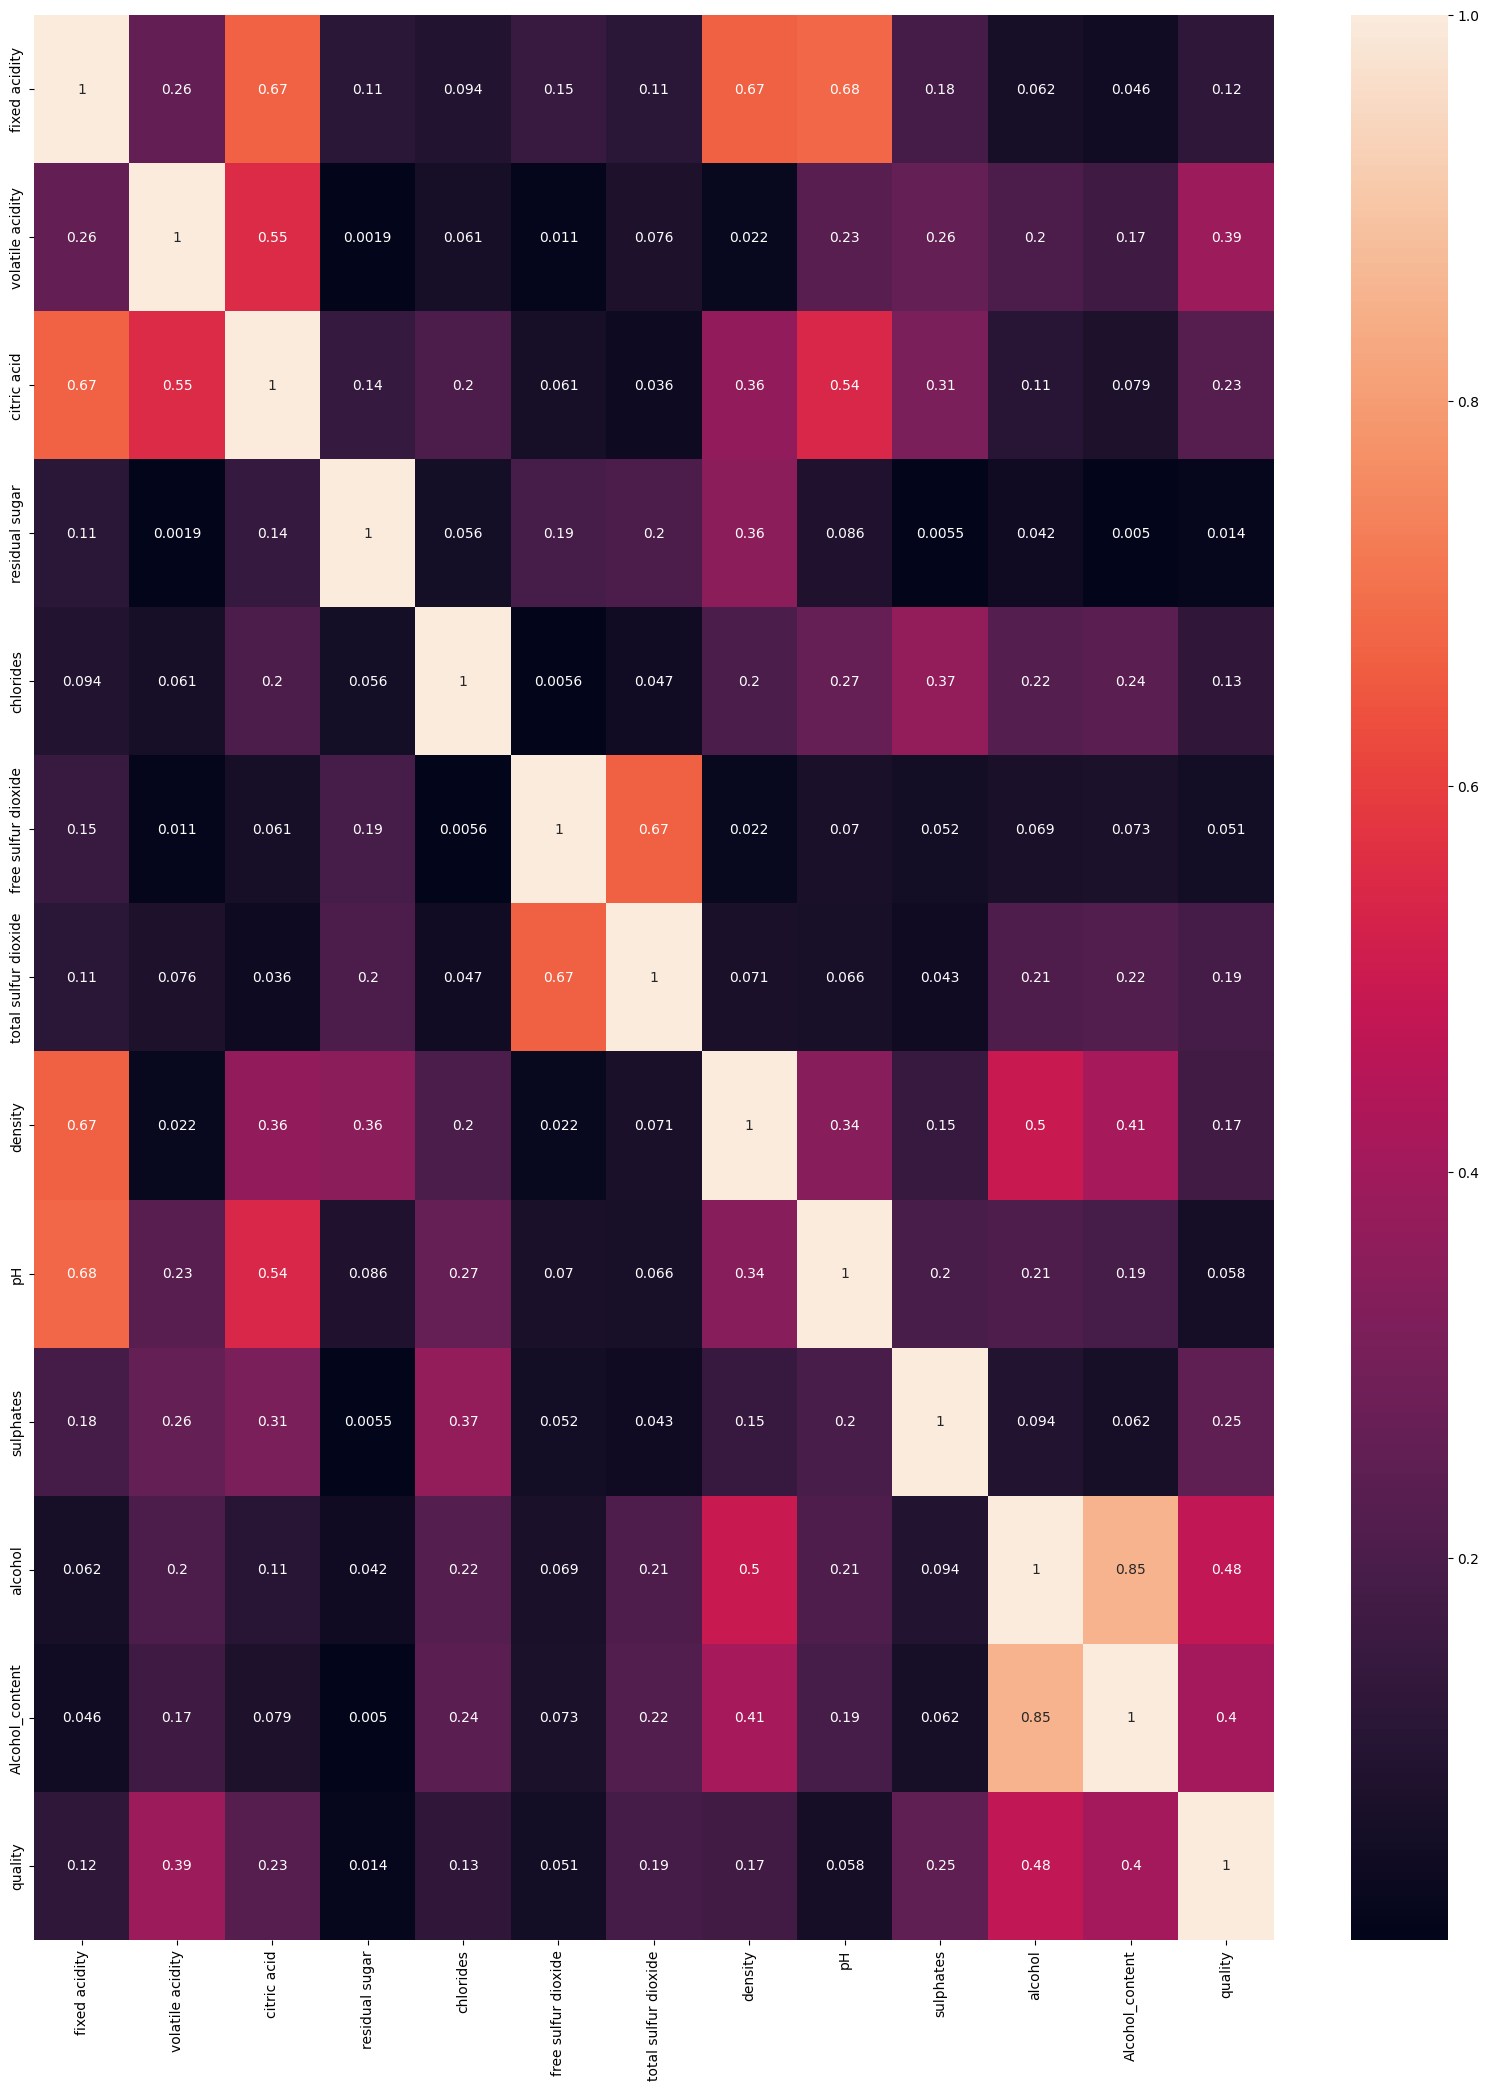

In [11]:
plt.figure(figsize=(20,25))
sns.heatmap(cor,annot=True,annot_kws={'size':10})
plt.show()

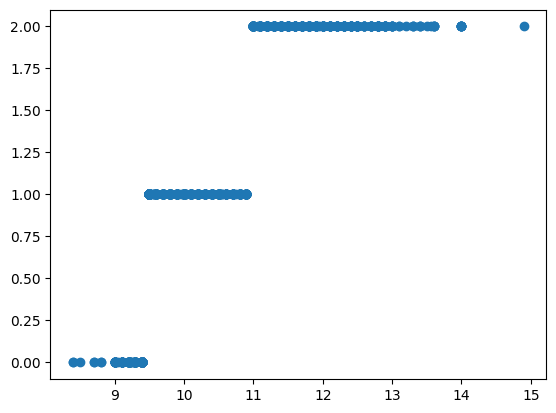

In [16]:
plt.scatter(data['alcohol'],data['Alcohol_content'])
plt.show()

In [12]:
x=data.drop(columns=['Alcohol_content','quality'])
y=data['quality']

In [13]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [14]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [17]:
scaler=StandardScaler()

In [18]:
x_scaled=scaler.fit_transform(x)

In [20]:
x_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=24)

In [50]:
def metrix_score(mod,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=mod.predict(x_train)
        print('================Accuracy Score for training data============')
        print(f'{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=mod.predict(x_test)
        print('===============Accuracy score for test data=================')
        print(f'{accuracy_score(y_test,pred)*100:.2f}%')

        print('===============Classification report===========================')
        print(classification_report(y_test,pred))
        
        
        

In [51]:
Dec_mod=DecisionTreeClassifier()

In [52]:
Dec_mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
metrix_score(Dec_mod,x_train,x_test,y_train,y_test,train=True)
metrix_score(Dec_mod,x_train,x_test,y_train,y_test,train=False)


===============Accuracy Score for training data============
100.00%
===============Accuracy score for test data=================
62.00%
==============Classification repor===========================
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.08      0.06      0.07        17
           5       0.71      0.70      0.71       166
           6       0.61      0.65      0.63       161
           7       0.52      0.52      0.52        48
           8       0.25      0.17      0.20         6

    accuracy                           0.62       400
   macro avg       0.36      0.35      0.35       400
weighted avg       0.61      0.62      0.62       400



In [66]:
grid_param={
    'criterion':['gini','entropy'],
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(5,10),
    'max_depth':range(10,15)
}

In [67]:
grid_search=GridSearchCV(estimator=Dec_mod,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1
                        )

In [68]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [69]:
best_params=grid_search.best_params_

In [70]:
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [71]:
Dec_model=DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=9,min_samples_leaf=2,min_samples_split=3)

In [73]:
Dec_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=3)

In [74]:
metrix_score(Dec_model,x_train,x_test,y_train,y_test,train=True)
metrix_score(Dec_model,x_train,x_test,y_train,y_test,train=False)

===============Accuracy Score for training data============
61.47%
===============Accuracy score for test data=================
51.75%
==============Classification repor===========================
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.58      0.73      0.65       166
           6       0.54      0.39      0.45       161
           7       0.30      0.50      0.38        48
           8       0.00      0.00      0.00         6

    accuracy                           0.52       400
   macro avg       0.24      0.27      0.25       400
weighted avg       0.50      0.52      0.50       400

